In [1]:
import pickle

In [23]:
path_old = '/Users/miladaghajohari/PycharmProjects/extramodels/league/league_20230403_1516_results_matrix.pkl'
path_self_play = '/Users/miladaghajohari/PycharmProjects/extramodels/league/leauge_20231405_1802_self_play_results_matrix.pkl'
path_trained_opponent = '/Users/miladaghajohari/PycharmProjects/extramodels/league/leauge_20231405_1802_trained_opponent_results_matrix.pkl'
path_no_self_play_v2 = '/Users/miladaghajohari/PycharmProjects/extramodels/league/leauge_20230515_1614_no_self_play_v2_results_matrix.pkl'
path_no_self_play_v2_trained_opponent = '/Users/miladaghajohari/PycharmProjects/extramodels/league/leauge_20230515_1614_no_self_play_v2_trained_opponent_results_matrix.pkl'
path_brs = '/Users/miladaghajohari/PycharmProjects/extramodels/league/league_20230808_0424_brs_nobr_brs_nobr_results_matrix.pkl'

with open(path_old, 'rb') as f:
    result1_matrix = pickle.load(f)
with open(path_self_play, 'rb') as f:
    result2_matrix = pickle.load(f)
with open(path_trained_opponent, 'rb') as f:
    result3_matrix = pickle.load(f)
with open(path_no_self_play_v2, 'rb') as f:
    result4_matrix = pickle.load(f)
with open(path_no_self_play_v2_trained_opponent, 'rb') as f:
    result5_matrix = pickle.load(f)
with open(path_brs, 'rb') as f:
    result6_matrix = pickle.load(f)

# join the results
result_matrix = {**result1_matrix, **result2_matrix, **result3_matrix, **result4_matrix, **result5_matrix, **result6_matrix}
# remove the old runs
old_runs = ['our_agent_no_self_play_seed_12', 'our_agent_no_self_play_seed_13', 'our_agent_no_self_play_seed_14']
result_matrix = {k: v for k, v in result_matrix.items() if not any(x in k for x in old_runs)}

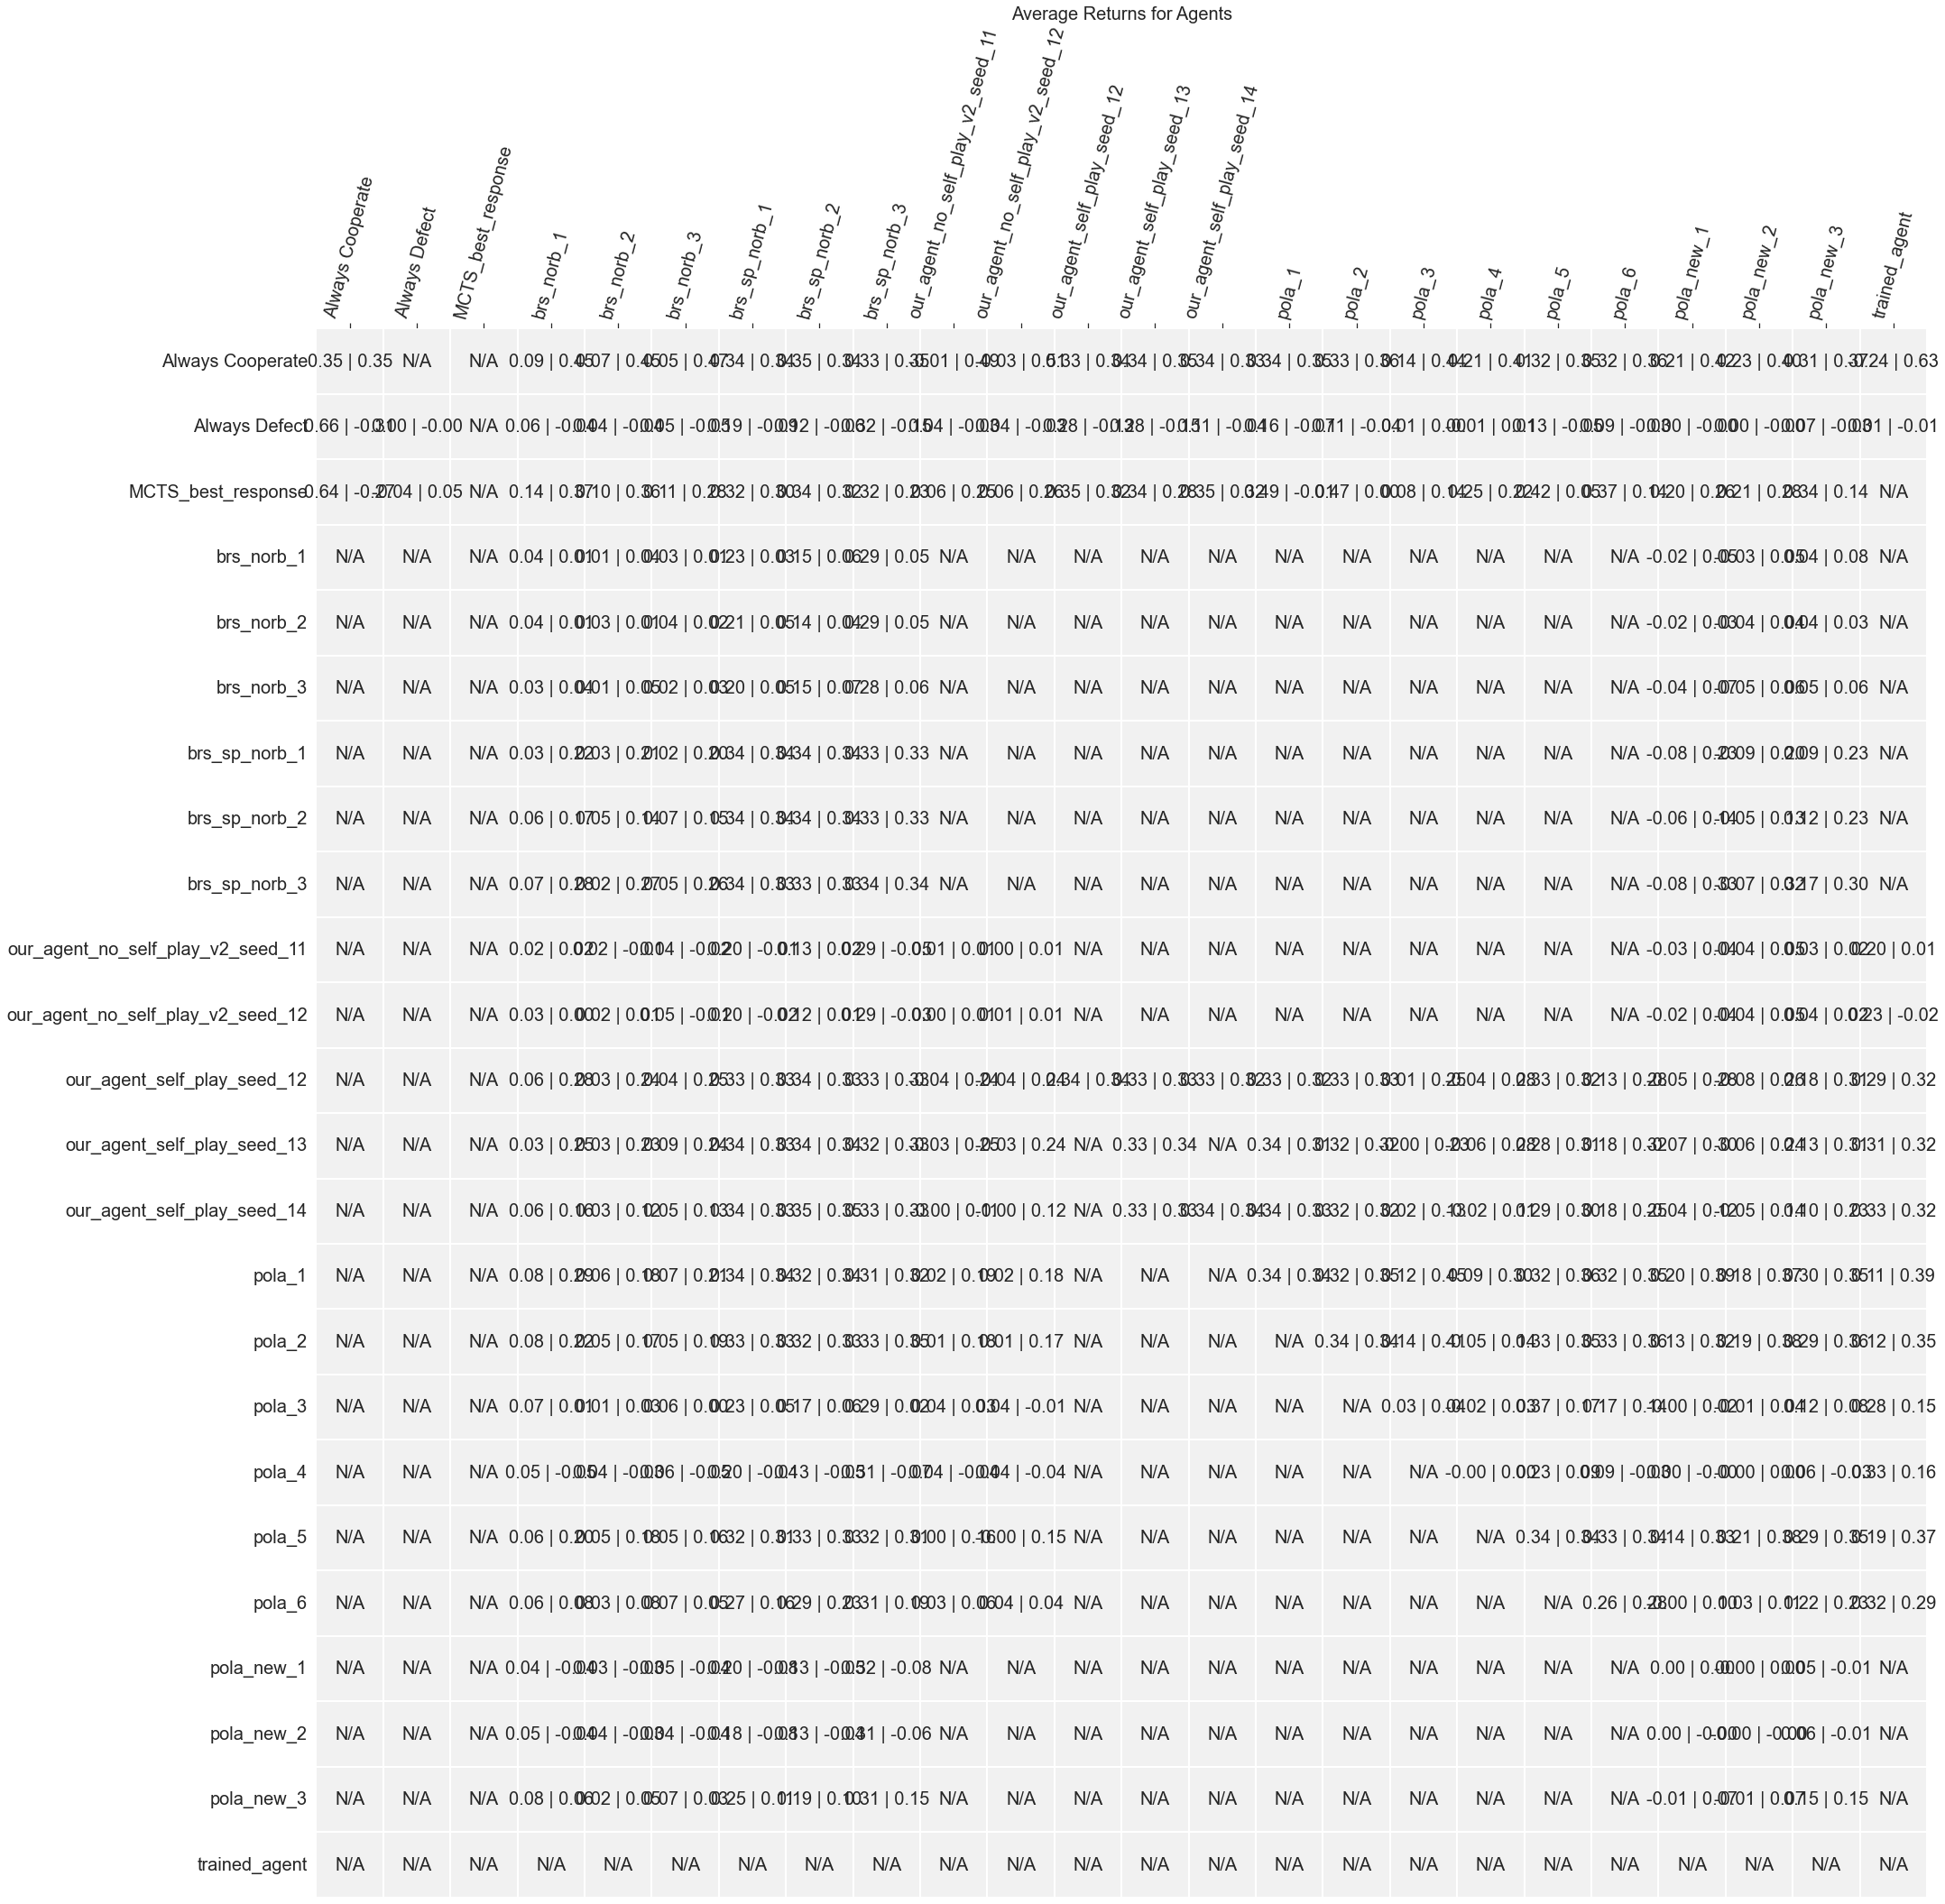

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the result_matrix into a DataFrame
df = pd.DataFrame(result_matrix, index=["Agent1", "Agent2"]).T

# Create a new DataFrame with the agent's names as both columns and index
agents = sorted(set([k[0] for k in result_matrix.keys()] + [k[1] for k in result_matrix.keys()]))
result_df = pd.DataFrame(index=agents, columns=agents)

# Fill the new DataFrame with the formatted strings containing the average returns
for agent1 in agents:
    for agent2 in agents:
        if (agent1, agent2) in df.index:
            stats = result_matrix[(agent1, agent2)][0]
            agent1_return = stats['mean_rewards'][0]
            agent2_return = stats['mean_rewards'][1]
            result_df.loc[agent1, agent2] = f"{agent1_return:.2f} | {agent2_return:.2f}"
        else:
            result_df.loc[agent1, agent2] = "N/A"  # or any custom value indicating missing data

# Create a seaborn heatmap using the created DataFrame
fig, ax = plt.subplots(figsize=(32, 32))
custom_cmap = sns.light_palette("white", as_cmap=True)  # Create a custom colormap with a white background

sns.heatmap(result_df.applymap(lambda x: 0.5), annot=result_df, fmt="", cmap=custom_cmap, cbar=False, linewidths=2.0, ax=ax,
            annot_kws={"fontsize": 20})  # Increase font size of annotations
ax.tick_params(axis='both', which='major', labelsize=20)  # Increase font size of axis labels
ax.set_title("Average Returns for Agents", fontsize=20)
ax.set_title("Average Returns for Agents", fontsize=20)

ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.savefig('league.png')
plt.show()

In [5]:
import pandas as pd

def generate_latex_table(result_matrix):
    # Convert the result_matrix into a DataFrame
    df = pd.DataFrame(result_matrix, index=["Agent1", "Agent2"]).T

    # Create a new DataFrame with the agent's names as both columns and index
    agents = sorted(set([k[0] for k in result_matrix.keys()] + [k[1] for k in result_matrix.keys()]))
    result_df = pd.DataFrame(index=agents, columns=agents)

    # Fill the new DataFrame with the formatted strings containing the average returns
    for agent1 in agents:
        for agent2 in agents:
            if (agent1, agent2) in df.index:
                stats = result_matrix[(agent1, agent2)][0]
                agent1_return = stats['mean_rewards'][0]
                agent2_return = stats['mean_rewards'][1]
                result_df.loc[agent1, agent2] = f"{agent1_return:.2f} | {agent2_return:.2f}"
            else:
                result_df.loc[agent1, agent2] = "N/A"  # or any custom value indicating missing data

    # Generate the LaTeX code for the table
    latex_table = result_df.to_latex(column_format="l|" + "c" * (len(agents) - 1) + "c", escape=False)

    return latex_table

# Use the function to generate the LaTeX code for the table
latex_table = generate_latex_table(result_matrix)

# Print the LaTeX code
print(latex_table)

# Save the LaTeX code to a .tex file
with open('league_table.tex', 'w') as file:
    file.write(latex_table)


\begin{tabular}{l|ccccccccccccccc}
\toprule
{} & Always Cooperate & Always Defect & MCTS_best_response & our_agent_no_self_play_v2_seed_11 & our_agent_no_self_play_v2_seed_12 & our_agent_self_play_seed_12 & our_agent_self_play_seed_13 & our_agent_self_play_seed_14 &        pola_1 &        pola_2 &        pola_3 &        pola_4 &        pola_5 &        pola_6 & trained_agent \\
\midrule
Always Cooperate                  &      0.35 | 0.35 &           N/A &                N/A &                      -0.01 | 0.49 &                      -0.03 | 0.51 &                 0.33 | 0.34 &                 0.34 | 0.35 &                 0.34 | 0.33 &   0.34 | 0.35 &   0.33 | 0.36 &   0.14 | 0.44 &   0.21 | 0.41 &   0.32 | 0.35 &   0.32 | 0.36 &  -0.24 | 0.63 \\
Always Defect                     &     0.66 | -0.31 &  0.00 | -0.00 &                N/A &                      0.04 | -0.03 &                      0.04 | -0.03 &                0.28 | -0.13 &                0.28 | -0.15 &                0.11 

/var/folders/85/7b7h6f6546nfwsb3v46bh2y00000gn/T/ipykernel_5506/3207189044.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = result_df.to_latex(column_format="l|" + "c" * (len(agents) - 1) + "c", escape=False)


In [6]:
import pandas as pd

def generate_latex_table(result_matrix):
    # Convert the result_matrix into a DataFrame
    df = pd.DataFrame(result_matrix, index=["Agent1", "Agent2"]).T

    # Create a new DataFrame with the agent's names as both columns and index
    agents = sorted(set([k[0] for k in result_matrix.keys()] + [k[1] for k in result_matrix.keys()]))
    result_df = pd.DataFrame(index=agents, columns=agents)

    # Fill the new DataFrame with the formatted strings containing the average returns
    for agent1 in agents:
        for agent2 in agents:
            if (agent1, agent2) in df.index:
                stats = result_matrix[(agent1, agent2)][0]
                agent1_return = stats['mean_rewards'][0]
                agent2_return = stats['mean_rewards'][1]
                result_df.loc[agent1, agent2] = f"{agent1_return:.2f} | {agent2_return:.2f}"
            else:
                result_df.loc[agent1, agent2] = "N/A"  # or any custom value indicating missing data

    # Generate the LaTeX code for the table
    result_df.index = result_df.index.str.replace('_', '')  # Escape underscores in agent names
    result_df.columns = result_df.columns.str.replace('_', '')  # Escape underscores in agent names
    latex_table = result_df.to_latex(column_format="l|" + "c" * (len(agents) - 1) + "c", escape=False)

    return latex_table

# Use the function to generate the LaTeX code for the table
latex_table = generate_latex_table(result_matrix)

# Print the LaTeX code
print(latex_table)

# Save the LaTeX code to a .tex file
with open('league_table.tex', 'w') as file:
    file.write(latex_table)


\begin{tabular}{l|ccccccccccccccc}
\toprule
{} & Always Cooperate & Always Defect & MCTSbestresponse & ouragentnoselfplayv2seed11 & ouragentnoselfplayv2seed12 & ouragentselfplayseed12 & ouragentselfplayseed13 & ouragentselfplayseed14 &         pola1 &         pola2 &         pola3 &         pola4 &         pola5 &         pola6 &  trainedagent \\
\midrule
Always Cooperate           &      0.35 | 0.35 &           N/A &              N/A &               -0.01 | 0.49 &               -0.03 | 0.51 &            0.33 | 0.34 &            0.34 | 0.35 &            0.34 | 0.33 &   0.34 | 0.35 &   0.33 | 0.36 &   0.14 | 0.44 &   0.21 | 0.41 &   0.32 | 0.35 &   0.32 | 0.36 &  -0.24 | 0.63 \\
Always Defect              &     0.66 | -0.31 &  0.00 | -0.00 &              N/A &               0.04 | -0.03 &               0.04 | -0.03 &           0.28 | -0.13 &           0.28 | -0.15 &           0.11 | -0.04 &  0.16 | -0.07 &  0.11 | -0.04 &   0.01 | 0.00 &  -0.01 | 0.01 &  0.13 | -0.05 &  0.09 | -0.03 &  

/var/folders/85/7b7h6f6546nfwsb3v46bh2y00000gn/T/ipykernel_5506/2201789583.py:25: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = result_df.to_latex(column_format="l|" + "c" * (len(agents) - 1) + "c", escape=False)


In [7]:
result_df.index

Index(['Always Cooperate', 'Always Defect', 'MCTS_best_response',
       'our_agent_no_self_play_v2_seed_11',
       'our_agent_no_self_play_v2_seed_12', 'our_agent_self_play_seed_12',
       'our_agent_self_play_seed_13', 'our_agent_self_play_seed_14', 'pola_1',
       'pola_2', 'pola_3', 'pola_4', 'pola_5', 'pola_6', 'trained_agent'],
      dtype='object')

In [8]:
result_matrix

{('MCTS_best_response',
  'Always Defect'): [{'mean_rewards': Array([-0.04125,  0.04875], dtype=float32),
   'mean_pickup_rewards': Array([-0.05903399,  0.06976744], dtype=float32),
   'action_entropy': Array([1.3853161, 1.3862507], dtype=float32),
   'easymisses': Array([0., 0.], dtype=float32),
   'adversity': Array([0.315  , 0.34125], dtype=float32),
   'adversarial_pickup_div_timesteps': Array([0.315  , 0.34125], dtype=float32),
   'any_pickup_div_timesteps': Array([0.64125, 0.67875], dtype=float32),
   'adversarial_pickup_div_all_pickup': Array([0.49122807, 0.50276244], dtype=float32),
   'own_pickup_div_timesteps': Array([0.32625, 0.3375 ], dtype=float32),
   'nearpasses': Array([0.00787402, 0.        ], dtype=float32)}],
 ('MCTS_best_response',
  'Always Cooperate'): [{'mean_rewards': Array([ 0.64375, -0.2725 ], dtype=float32),
   'mean_pickup_rewards': Array([ 0.8626466 , -0.36515912], dtype=float32),
   'action_entropy': Array([1.3844537, 1.3856065], dtype=float32),
   'easymi

In [26]:
# first extract agent vs mcts returns
import numpy as np
agent_names = [(['our_agent_self_play_seed_12',
               'our_agent_self_play_seed_13',
               'our_agent_self_play_seed_14',], 'Detective-SP'),
               (['our_agent_no_self_play_seed_12',
               'our_agent_no_self_play_seed_13',
               'our_agent_no_self_play_seed_14'], 'Detective'),
               (['pola_1',
               'pola_2',
               'pola_3'],'pola'),
               (['Always Cooperate'], 'AC'),
               (['Always Defect'], 'AD'),
               (['pola_new_1', 'pola_new_2', 'pola_new_3'], 'POLA(new)'),
               (['brs_norb_1', 'brs_norb_2','brs_norb_3'], 'BRS-NORB'),
               (['brs_sp_norb_1', 'brs_sp_norb_2', 'brs_sp_norb_3'], 'BRS-SP-NORB'),
               ]

res = {}
result_df = pd.DataFrame(index=[x[1] for x in agent_names], columns=['agent_return', 'mcts_return', 'agent_std', 'mcts_std'])
for agent_name_list, table_name in agent_names:
    agent_returns = []
    mcts_returns = []
    for agent_name in agent_name_list:
        stats = result_matrix[(agent_name, 'MCTS')][0]
        agent_return = stats['mean_rewards'][0]
        mcts_return = stats['mean_rewards'][1]
        agent_returns.append(agent_return)
        mcts_returns.append(mcts_return)
    agent_return = np.mean(agent_returns)
    mcts_return = np.mean(mcts_returns)
    agent_std = np.std(agent_returns)
    mcts_std = np.std(mcts_returns)
    result_df.loc[table_name, 'agent_return'] = f"{agent_return:.2f}"
    result_df.loc[table_name, 'mcts_return'] = f"{mcts_return:.2f}"
    result_df.loc[table_name, 'agent_std'] = f"{agent_std:.2f}"
    result_df.loc[table_name, 'mcts_std'] = f"{mcts_std:.2f}"


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for a nice looking plot
sns.set(style="whitegrid")

# Create a bar plot with the provided settings
fig, ax = plt.subplots(figsize=(12, 7))
width = 0.35
ind = np.arange(len(agent_names))
bar1 = ax.bar(ind - width/2, result_df['agent_return'].astype(float), width, label='Agent Return', color='crimson')
bar2 = ax.bar(ind + width/2, result_df['mcts_return'].astype(float), width, label='MCTS Return', color='lightblue')
# plot std_bars
ax.errorbar(ind - width/2, result_df['agent_return'].astype(float), yerr=result_df['agent_std'].astype(float), fmt='none', ecolor='black', capsize=5)
ax.errorbar(ind + width/2, result_df['mcts_return'].astype(float), yerr=result_df['mcts_std'].astype(float), fmt='none', ecolor='black', capsize=5)

# put border around bars
for rect in bar1 + bar2:
    rect.set_edgecolor('black')

#bar1[0].set_linewidth(5)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Customize the appearance of the plot
ax.set_title('Agent Returns vs MCTS Returns', fontsize=20, pad=10)
ax.set_xticks(ind)
ax.set_xticklabels(result_df.index, rotation=15, fontsize=16)
ax.set_ylabel('Returns', fontsize=16)
ax.legend(fontsize=16)
# increase y axis font
ax.tick_params(axis='y', labelsize=16)

# Add values on top of the bars
for rect in bar1 + bar2:
    height = rect.get_height()
    top = max(height, 0.0)
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, top),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=16)

# show the best one
best_agent = result_df['agent_return'].astype(float).idxmax()
# add horizontal dashed line to best agent
ax.axhline(y=float(result_df.loc[best_agent, 'agent_return']), color='red', linestyle='--', linewidth=2)

# error bars
# TODO: get real error bars
agent_xs = [rect.get_x() + rect.get_width() / 2 for rect in bar1]
ax.errorbar(agent_xs, result_df['agent_return'].astype(float), yerr=0.00, fmt='none', ecolor='black', capsize=10)
mcts_xs = [rect.get_x() + rect.get_width() / 2 for rect in bar2]
ax.errorbar(mcts_xs, result_df['mcts_return'].astype(float), yerr=0.00, fmt='none', ecolor='black', capsize=10)

# Show the plot
plt.show()
# save plot high resolution in pdf
fig.savefig('agent_vs_mcts.pdf', bbox_inches='tight', dpi=300)

KeyError: ('our_agent_self_play_seed_12', 'MCTS')

In [27]:
float(result_df.loc[best_agent, 'agent_return'])

NameError: name 'best_agent' is not defined

/var/folders/85/7b7h6f6546nfwsb3v46bh2y00000gn/T/ipykernel_5506/2551882578.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


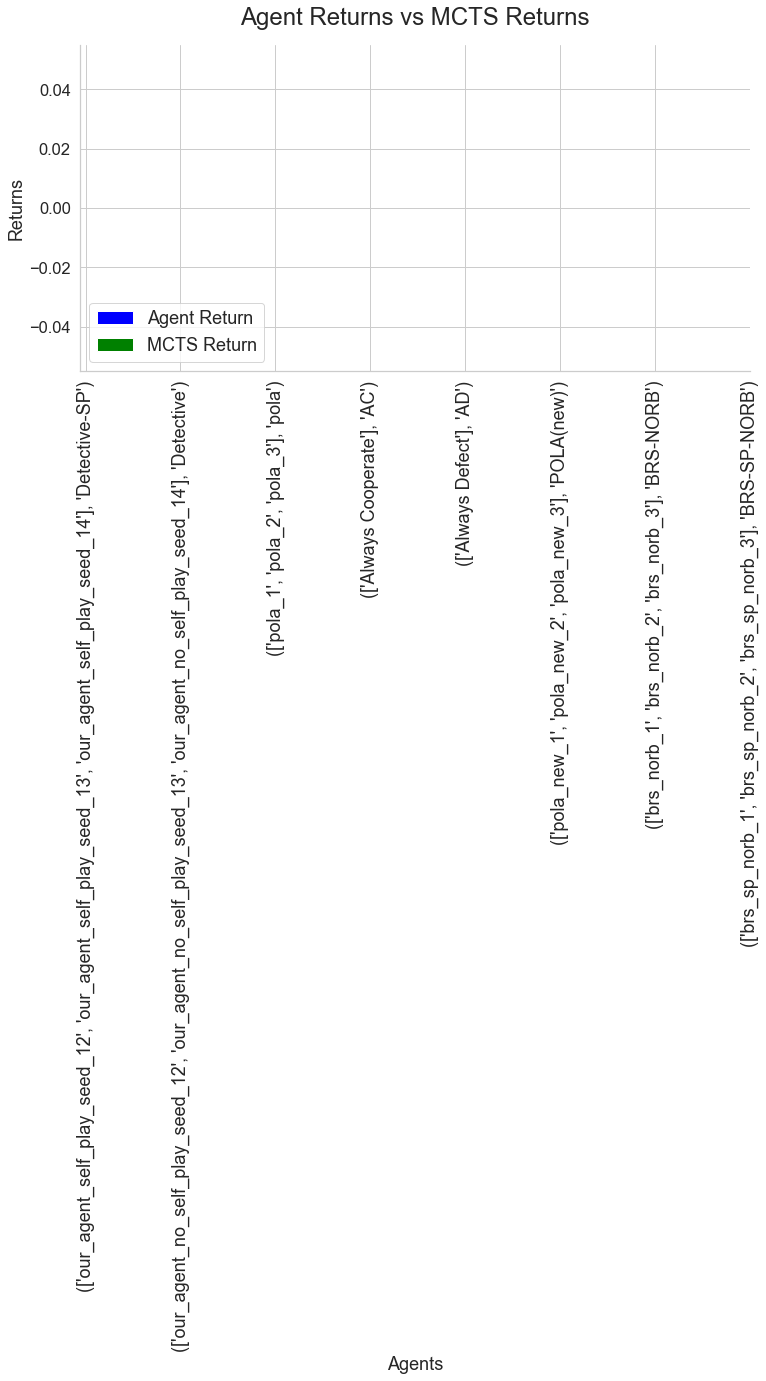

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for a nice looking plot
sns.set(style="whitegrid", font_scale=1.5)

# Set the plot size to fill an A4 page
fig, ax = plt.subplots(figsize=(12,6))

# Create a bar plot with the provided settings
width = 0.25
ind = np.arange(len(agent_names))
bar1 = ax.bar(ind - width/2, result_df['agent_return'].astype(float), width, label='Agent Return', color='blue')
bar2 = ax.bar(ind + width/2, result_df['mcts_return'].astype(float), width, label='MCTS Return', color='green')

# Customize the appearance of the plot
ax.set_title(r'Agent Returns vs MCTS Returns', fontsize=24, pad=20)
ax.set_xticks(ind)
ax.set_xticklabels(agent_names, rotation=90, fontsize=18)
ax.set_xlabel(r'Agents', fontsize=18)
ax.set_ylabel(r'Returns', fontsize=18)
ax.legend(fontsize=18)

# Add values on top of the bars
for rect in bar1 + bar2:
    top = max(rect.get_height(), 0.0)
    ax.annotate(rf'\textbf{{{rect.get_height():.2f}}}',
                xy=(rect.get_x() + rect.get_width() / 2, top),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=16)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
bar1[0]
# get the starting point of the bar
height = bar1[2].get_height()
height

nan

# Evaluate vs criteria


In [41]:
# Generate Bar plots comparing our agent self play with POLA agents
result_matrix
agents_dict = {'ours_self_play':['our_agent_self_play_seed_12', 'our_agent_self_play_seed_13', 'our_agent_self_play_seed_14'],
               'pola': ['pola_1', 'pola_2', 'pola_3', 'pola_4', 'pola_5', 'pola_6'],
               'ours_no_self_play': ['our_agent_no_self_play_v2_seed_11', 'our_agent_no_self_play_v2_seed_12'],
               'ac': ['Always Cooperate'],
               'ad': ['Always Defect'],
               'brs_norb': ['brs_norb_1', 'brs_norb_2', 'brs_norb_3'],
               'brs_sp_norb': ['brs_sp_norb_1', 'brs_sp_norb_2', 'brs_sp_norb_3'],
               }
opponents = ['self', 'Always Cooperate', 'Always Defect', 'MCTS_best_response',]#'trained_agent']
opponent_renaming_dict = {'Always Cooperate': 'AC', 'Always Defect': 'AD', 'MCTS_best_response': 'MCTS', 'self': 'Self', 'trained_agent': 'Trained'}

In [42]:
result_matrix.keys()

dict_keys([('MCTS_best_response', 'Always Defect'), ('MCTS_best_response', 'Always Cooperate'), ('MCTS_best_response', 'our_agent_self_play_seed_12'), ('MCTS_best_response', 'our_agent_self_play_seed_14'), ('MCTS_best_response', 'our_agent_self_play_seed_13'), ('MCTS_best_response', 'pola_1'), ('MCTS_best_response', 'pola_2'), ('MCTS_best_response', 'pola_3'), ('MCTS_best_response', 'pola_4'), ('MCTS_best_response', 'pola_5'), ('MCTS_best_response', 'pola_6'), ('Always Defect', 'Always Cooperate'), ('Always Defect', 'our_agent_self_play_seed_12'), ('Always Defect', 'our_agent_self_play_seed_14'), ('Always Defect', 'our_agent_self_play_seed_13'), ('Always Defect', 'pola_1'), ('Always Defect', 'pola_2'), ('Always Defect', 'pola_3'), ('Always Defect', 'pola_4'), ('Always Defect', 'pola_5'), ('Always Defect', 'pola_6'), ('Always Cooperate', 'our_agent_self_play_seed_12'), ('Always Cooperate', 'our_agent_self_play_seed_14'), ('Always Cooperate', 'our_agent_self_play_seed_13'), ('Always Coop

In [43]:
from collections import defaultdict
import numpy as np
mean_rets_list_dict = defaultdict(list)
std_rets_list_dict = defaultdict(list)
results_of_play_with_opponent = defaultdict(lambda: defaultdict(list))
for agent_meta in agents_dict.keys():
    agents = agents_dict[agent_meta]
    for opponent in opponents:
        print(f'Playing against {opponent}')
        rets = []
        if opponent == 'self':
            for agent in agents:
                result = result_matrix[(agent, agent)][0]
                rets.append(result['mean_rewards'])
                results_of_play_with_opponent[agent_meta][opponent].append(result)
        else:
            for agent in agents:
                if (opponent, agent) in result_matrix:
                    result = result_matrix[(opponent, agent)][0]
                elif (agent, opponent) in result_matrix:
                    result = result_matrix[(agent, opponent)][0]
                    result = {k: v[..., ::-1] for k, v in result.items()}
                else:
                    print(f'No results for {agent} vs {opponent}')
                    continue
                rets.append(result['mean_rewards'])
                results_of_play_with_opponent[agent_meta][opponent].append(result)

        mean_rets = sum(rets)/len(rets)
        std_rets = np.std(rets, axis=0)
        print('std rets: ', std_rets)
        print(f'Average return: {mean_rets}')
        mean_rets_list_dict[agent_meta].append(mean_rets)
        std_rets_list_dict[agent_meta].append(std_rets)
print(mean_rets_list_dict)

Playing against self
std rets:  [0.00405047 0.0010623 ]
Average return: [0.33687496 0.34104165]
Playing against Always Cooperate
std rets:  [0.00510311 0.00562115]
Average return: [0.33624998 0.34166667]
Playing against Always Defect
std rets:  [0.07898664 0.04456191]
Average return: [ 0.22166668 -0.10583333]
Playing against MCTS_best_response
std rets:  [0.00562114 0.01649916]
Average return: [0.34666666 0.30583334]
Playing against self
std rets:  [0.14740771 0.14537908]
Average return: [0.219375   0.22385417]
Playing against Always Cooperate
std rets:  [0.07506826 0.03490625]
Average return: [0.2770833 0.3789583]
Playing against Always Defect
std rets:  [0.06006688 0.02808098]
Average return: [ 0.08145833 -0.03      ]
Playing against MCTS_best_response
std rets:  [0.14115486 0.0839542 ]
Average return: [0.3477083 0.088125 ]
Playing against self
std rets:  [0.0021875 0.0025   ]
Average return: [0.0128125 0.008125 ]
Playing against Always Cooperate
std rets:  [0.01       0.00625001]
Av

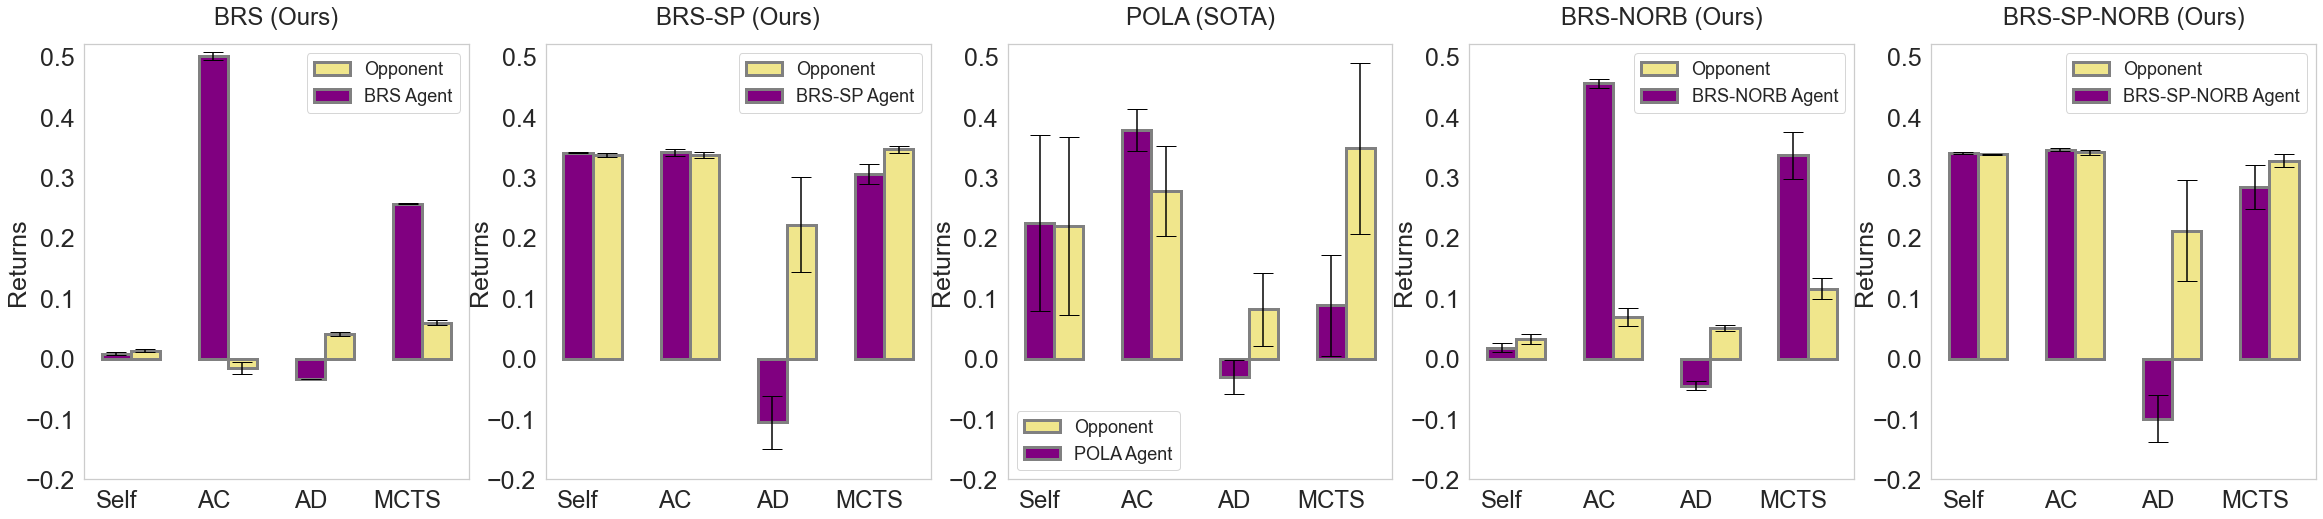

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(40,8))

# Define width and indices for bars
width = 0.30
ind = np.arange(len(opponents))

agent2 = 'ours_self_play'
agent2_name = 'BRS-SP (Ours)'
agent3 = 'pola'
agent3_name = 'POLA (SOTA)'
agent1 = 'ours_no_self_play'
agent1_name = 'BRS (Ours)'
agent4 = 'brs_norb'
agent4_name = 'BRS-NORB (Ours)'
agent5 = 'brs_sp_norb'
agent5_name = 'BRS-SP-NORB (Ours)'


# Bar plot 1
y = [x[0] for x in mean_rets_list_dict[agent1]]
bar1 = axs[0].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent1]]
axs[0].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

y = [x[1] for x in mean_rets_list_dict[agent1]]
bar2 = axs[0].bar(ind, y, width, label='BRS Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent1]]
axs[0].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 2
y = [x[0] for x in mean_rets_list_dict[agent2]]
bar3 = axs[1].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent2]]
axs[1].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent2]]
bar4 = axs[1].bar(ind, y, width, label='BRS-SP Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent2]]
axs[1].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 3
y = [x[0] for x in mean_rets_list_dict[agent3]]
bar5 = axs[2].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent3]]
axs[2].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent3]]
bar6 = axs[2].bar(ind , y, width, label='POLA Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent3]]
axs[2].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 4
y = [x[0] for x in mean_rets_list_dict[agent4]]
bar7 = axs[3].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent4]]
axs[3].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent4]]
bar8 = axs[3].bar(ind , y, width, label='BRS-NORB Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent4]]
axs[3].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 5
y = [x[0] for x in mean_rets_list_dict[agent5]]
bar9 = axs[4].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent5]]
axs[4].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent5]]
bar10 = axs[4].bar(ind , y, width, label='BRS-SP-NORB Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent5]]
axs[4].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)


# Set gray border over bars
for rect in bar1 + bar2 + bar3 + bar4 + bar5 + bar6 + bar7 + bar8 + bar9 + bar10:
    rect.set_edgecolor('gray')
    rect.set_linewidth(3.0)

# Customize the appearance of the plots
axs[0].set_title(agent1_name, fontsize=24, pad=20)
axs[1].set_title(agent2_name, fontsize=24, pad=20)
axs[2].set_title(agent3_name, fontsize=24, pad=20)
axs[3].set_title(agent4_name, fontsize=24, pad=20)
axs[4].set_title(agent5_name, fontsize=24, pad=20)

# share the y axis
axs[0].set_ylim([-0.2, 0.52])
axs[1].set_ylim([-0.2, 0.52])
axs[2].set_ylim([-0.2, 0.52])
axs[3].set_ylim([-0.2, 0.52])
axs[4].set_ylim([-0.2, 0.52])
for ax in axs:
    ax.set_xticks(ind)
    ax.set_xticklabels(map(lambda name: opponent_renaming_dict[name], opponents), rotation=0, fontsize=24)
    #ax.set_xlabel(r'Agents', fontsize=25)
    ax.set_ylabel(r'Returns', fontsize=25, labelpad=-5)
    ax.tick_params(axis='y', labelsize=25)
    ax.legend(fontsize=18)
    # decrease distance between y label and y axis

#plt.tight_layout()  # Add space between plots
plt.show()

# save plot high resolution in pdf
fig.savefig('coin_main_comparison_all_three.pdf', bbox_inches='tight', dpi=300)

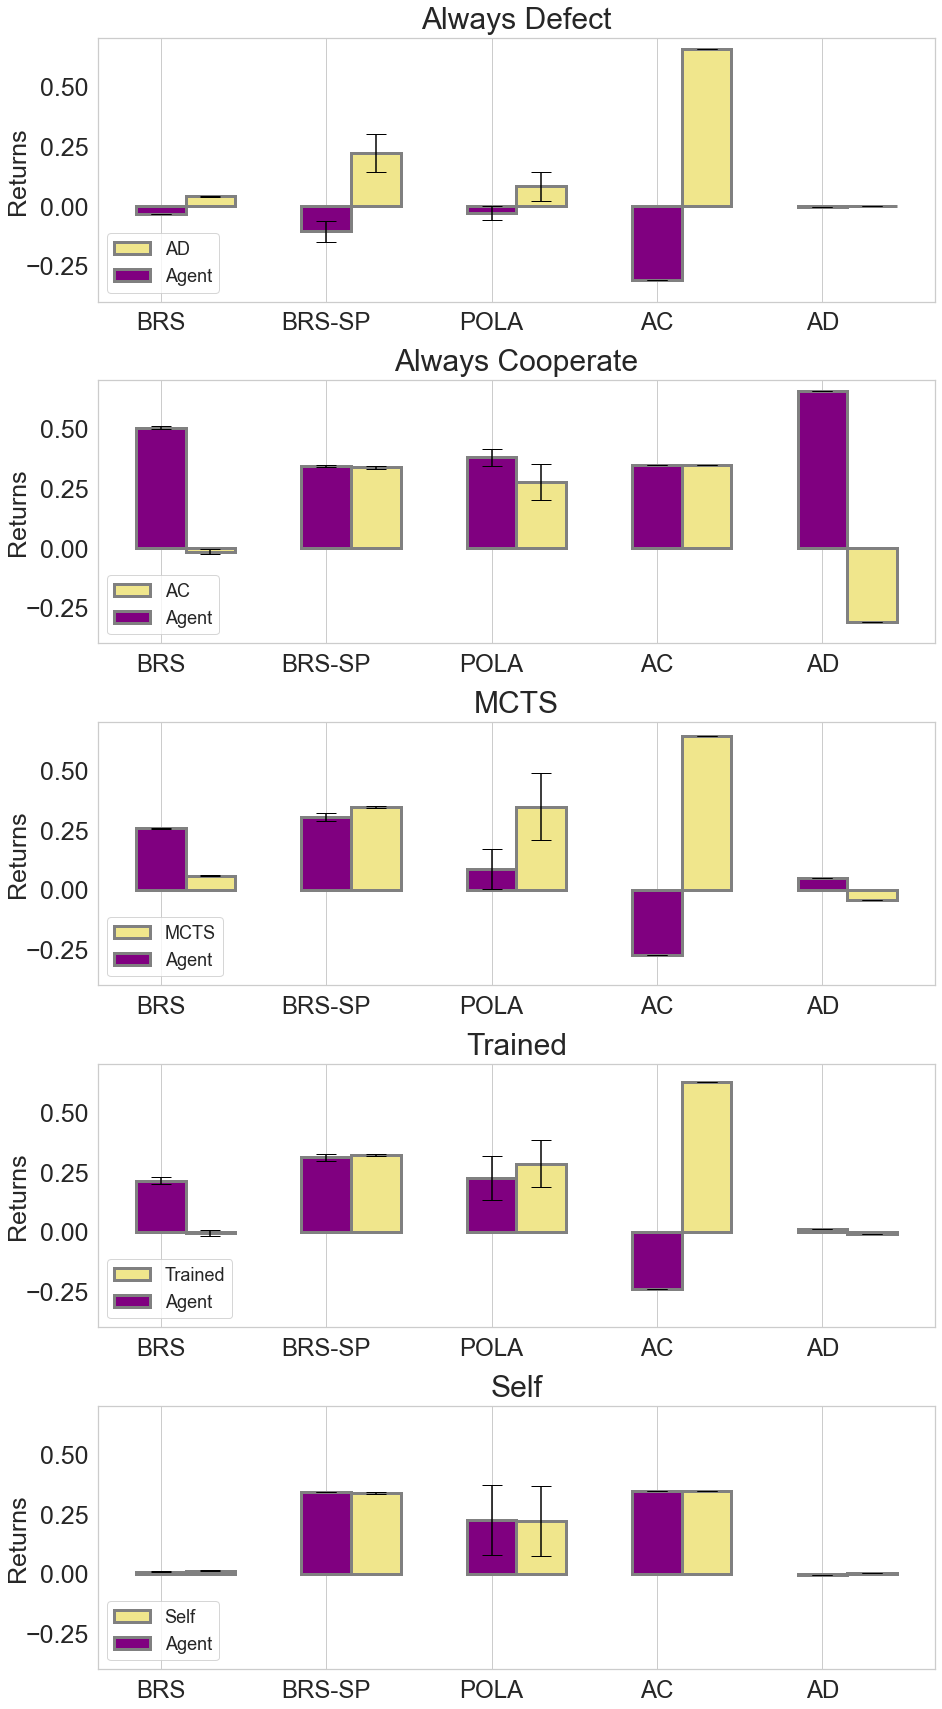

In [17]:
agent_meta_list = ['ours_no_self_play', 'ours_self_play', 'pola', 'ac', 'ad']
agent_meta_name_list = ['BRS', 'BRS-SP', 'POLA', 'AC', 'AD']
opponent_mean_rets_list_dict = defaultdict(list)
opponent_std_rets_list_dict = defaultdict(list)
for opp in opponents:
    for am in agent_meta_list:
        opponent_mean_rets_list_dict[opp].append(mean_rets_list_dict[am][opponents.index(opp)])
        opponent_std_rets_list_dict[opp].append(std_rets_list_dict[am][opponents.index(opp)])

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

# Define width and indices for bars
width = 0.30
ind = np.arange(len(agent_meta_list))

agent2 = 'ours_self_play'
agent2_name = 'BRS-SP (Ours)'
agent3 = 'pola'
agent3_name = 'POLA (SOTA)'
agent1 = 'ours_no_self_play'
agent1_name = 'BRS (Ours)'

# Bar plot 1
y = [x[0] for x in opponent_mean_rets_list_dict['self']]
bar1 = axs[4].bar(ind + width, y, width, label='Self', color='khaki')
yerr = [x[0] for x in opponent_std_rets_list_dict['self']]
axs[4].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

y = [x[1] for x in opponent_mean_rets_list_dict['self']]
bar2 = axs[4].bar(ind, y, width, label='Agent', color='purple')
yerr = [x[1] for x in opponent_std_rets_list_dict['self']]
axs[4].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 2
y = [x[0] for x in opponent_mean_rets_list_dict['Always Cooperate']]
bar3 = axs[1].bar(ind + width, y, width, label='AC', color='khaki')
yerr = [x[0] for x in opponent_std_rets_list_dict['Always Cooperate']]
axs[1].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in opponent_mean_rets_list_dict['Always Cooperate']]
bar4 = axs[1].bar(ind, y, width, label='Agent', color='purple')
yerr = [x[1] for x in opponent_std_rets_list_dict['Always Cooperate']]
axs[1].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 3
y = [x[0] for x in opponent_mean_rets_list_dict['Always Defect']]
bar5 = axs[0].bar(ind + width, y, width, label='AD', color='khaki')
yerr = [x[0] for x in opponent_std_rets_list_dict['Always Defect']]
axs[0].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in opponent_mean_rets_list_dict['Always Defect']]
bar6 = axs[0].bar(ind, y, width, label='Agent', color='purple')
yerr = [x[1] for x in opponent_std_rets_list_dict['Always Defect']]
axs[0].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 4
y = [x[0] for x in opponent_mean_rets_list_dict['MCTS_best_response']]
bar7 = axs[2].bar(ind + width, y, width, label='MCTS', color='khaki')
yerr = [x[0] for x in opponent_std_rets_list_dict['MCTS_best_response']]
axs[2].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in opponent_mean_rets_list_dict['MCTS_best_response']]
bar8 = axs[2].bar(ind, y, width, label='Agent', color='purple')
yerr = [x[1] for x in opponent_std_rets_list_dict['MCTS_best_response']]
axs[2].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 5
y = [x[0] for x in opponent_mean_rets_list_dict['trained_agent']]
bar9 = axs[3].bar(ind + width, y, width, label='Trained', color='khaki')
yerr = [x[0] for x in opponent_std_rets_list_dict['trained_agent']]
axs[3].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in opponent_mean_rets_list_dict['trained_agent']]
bar10 = axs[3].bar(ind, y, width, label='Agent', color='purple')
yerr = [x[1] for x in opponent_std_rets_list_dict['trained_agent']]
axs[3].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)


# Set gray border over bars
for rect in bar1 + bar2 + bar3 + bar4 + bar5 + bar6 + bar7 + bar7 + bar8 + bar9 + bar10:
    rect.set_edgecolor('gray')
    rect.set_linewidth(3.0)

# Customize the appearance of the plots
axs[4].set_title('Self', fontsize=30, pad=10)
axs[1].set_title('Always Cooperate', fontsize=30, pad=10)
axs[0].set_title('Always Defect', fontsize=30, pad=10)
axs[2].set_title('MCTS', fontsize=30, pad=10)
axs[3].set_title('Trained', fontsize=30, pad=10)


for ax in axs:
    ax.set_xticks(ind)
    ax.set_xticklabels(agent_meta_name_list, rotation=0, fontsize=24)
    #ax.set_xlabel(r'Agents', fontsize=25)
    #ax.set_ylabel(r'Returns', fontsize=25, labelpad=-5)
    # remove tick params for y axis
    ax.tick_params(axis='y', labelsize=25)
    ax.legend(fontsize=18, loc='lower left')
    ax.set_ylim([-0.4, 0.7])
    ax.set_ylabel(r'Returns', fontsize=25, labelpad=-5)
axs[0].tick_params(axis='y', labelsize=25)
#remove vertical gridlines
axs[0].grid(axis='y')
axs[1].grid(axis='y')
axs[2].grid(axis='y')
axs[3].grid(axis='y')
axs[4].grid(axis='y')

#plt.tight_layout()  # Add space between plots
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# save plot high resolution in pdf
fig.savefig('coin_figure_all_evaluation.pdf', bbox_inches='tight', dpi=300)

In [18]:
# Scatter of ours vs POLA

{'mean_rewards': Array([0.33875, 0.3425 ], dtype=float32), 'mean_pickup_rewards': Array([0.49452555, 0.5       ], dtype=float32), 'action_entropy': Array([1.3845185, 1.3848037], dtype=float32), 'easymisses': Array([0.00364964, 0.00181818], dtype=float32), 'adversity': Array([0.00125 , 0.001875], dtype=float32), 'adversarial_pickup_div_timesteps': Array([0.00125 , 0.001875], dtype=float32), 'any_pickup_div_timesteps': Array([0.3425, 0.345 ], dtype=float32), 'adversarial_pickup_div_all_pickup': Array([0.00364964, 0.00543478], dtype=float32), 'own_pickup_div_timesteps': Array([0.34125 , 0.343125], dtype=float32), 'nearpasses': Array([0.99480516, 0.9916434 ], dtype=float32)}
{'mean_rewards': Array([0.32999998, 0.33249998], dtype=float32), 'mean_pickup_rewards': Array([0.4808743, 0.4845173], dtype=float32), 'action_entropy': Array([1.3856174, 1.3842365], dtype=float32), 'easymisses': Array([0., 0.], dtype=float32), 'adversity': Array([0.00875, 0.01125], dtype=float32), 'adversarial_pickup_d

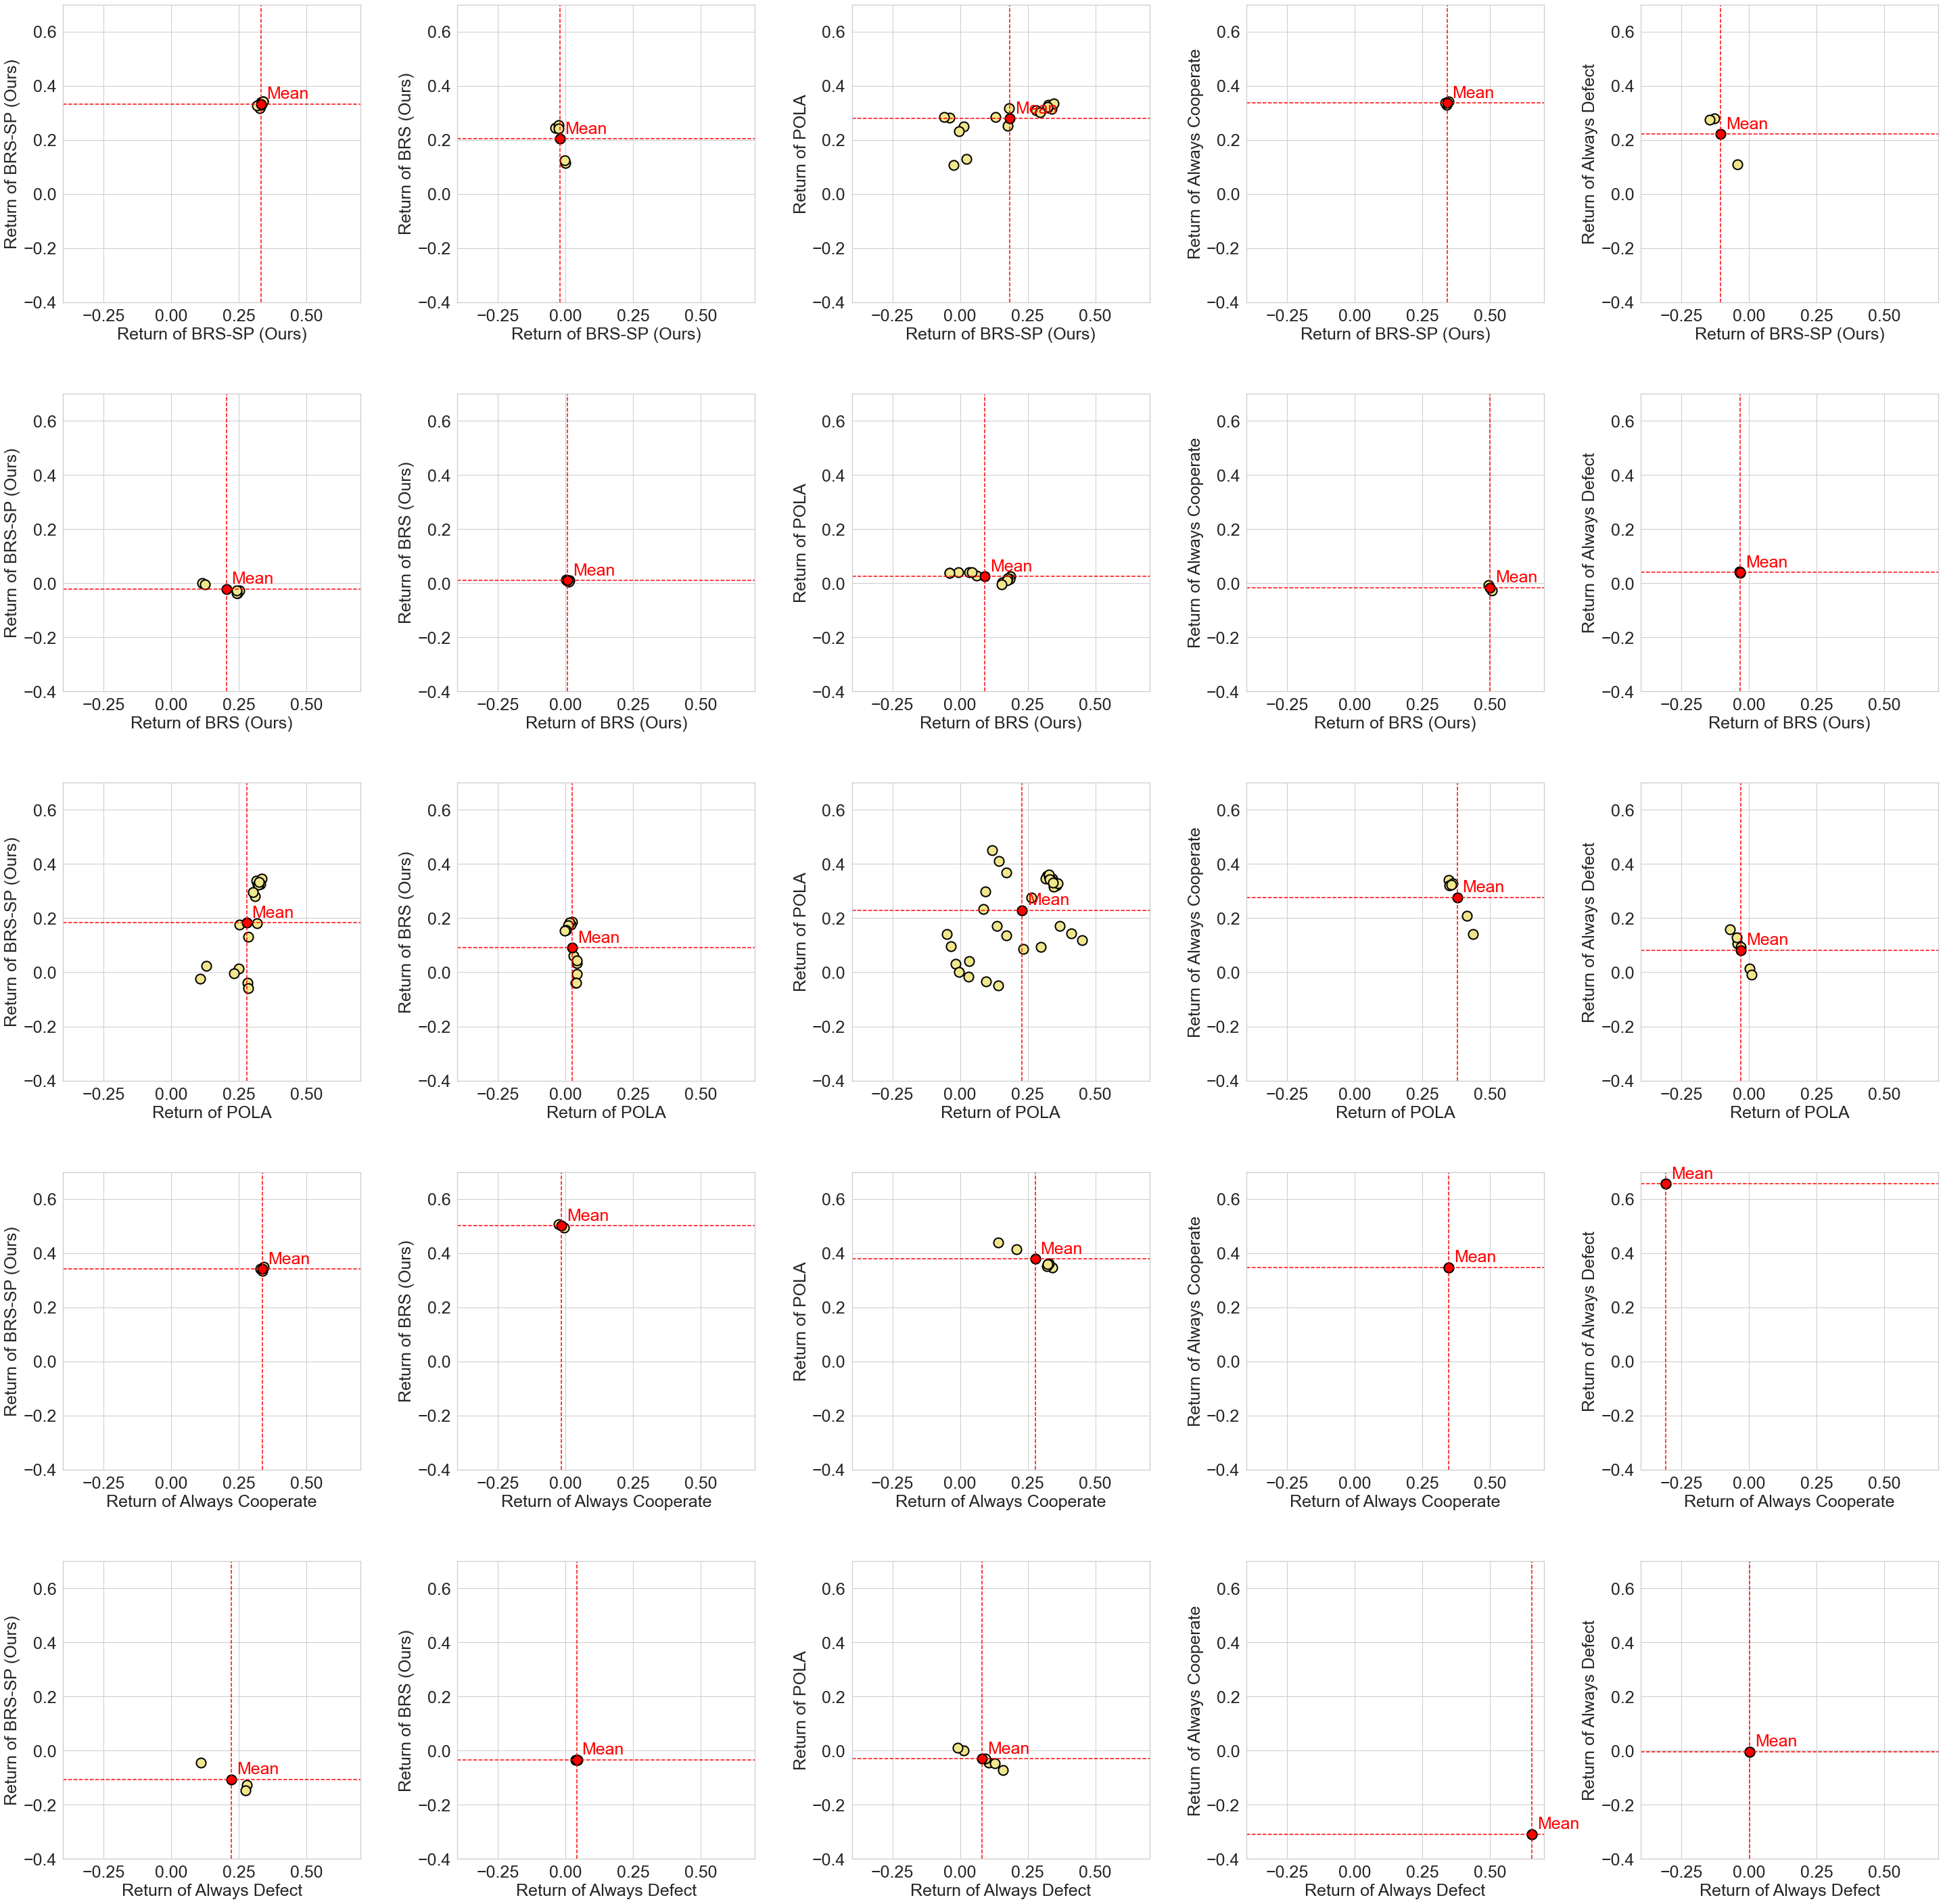

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np

# Set the Seaborn theme for a nice, clean look
sns.set_theme(style='whitegrid')
names = ['ours_self_play', 'ours_no_self_play', 'pola', 'ac', 'ad']
pairs = [(x, y) for x in names for y in names]
#pairs = [('ours_self_play', 'pola'), ('ours_no_self_play', 'pola'), ('ours_self_play', 'ours_no_self_play')]
good_names_dict = {'ours_self_play': 'BRS-SP (Ours)', 'ours_no_self_play': 'BRS (Ours)', 'pola': 'POLA', 'ac': 'Always Cooperate', 'ad': 'Always Defect'}
n_plots = len(pairs)
fig, axs = plt.subplots(n_plots//5, 5, figsize=(8*5, 8*(n_plots//5)))

for idx, pair in enumerate(pairs):
    agent_1_meta, agent_2_meta = pair
    results = []
    for agent_1 in agents_dict[agent_1_meta]:
        for agent_2 in agents_dict[agent_2_meta]:
            if (agent_1, agent_2) in result_matrix:
                result = result_matrix[(agent_1, agent_2)][0]
            elif (agent_2, agent_1) in result_matrix:
                result = result_matrix[(agent_2, agent_1)][0]
                result = {k: v[..., ::-1] for k, v in result.items()}
            print(result)
            results.append(result)
    ax = axs[idx//5, idx%5]
    print(ax)
    agent_1_ret = [r['mean_rewards'][0] for r in results]
    agent_2_ret = [r['mean_rewards'][1] for r in results]
    ax.scatter(agent_1_ret, agent_2_ret, s=200, edgecolor='black', linewidth=2.0, color='khaki')
    mean_agent_1_ret = sum(agent_1_ret) / len(agent_1_ret)
    mean_agent_2_ret = sum(agent_2_ret) / len(agent_2_ret)
    # show mean
    ax.scatter(mean_agent_1_ret, mean_agent_2_ret, s=200, edgecolor='black', linewidth=2.0, color='red')
    # tag mean
    ax.annotate('Mean', (mean_agent_1_ret+0.02, mean_agent_2_ret+0.02), fontsize=25, color='red')
    # draw vertical and horizontal dashed lines at mean
    ax.axvline(mean_agent_1_ret, linestyle='--', color='red')
    ax.axhline(mean_agent_2_ret, linestyle='--', color='red')
    # increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=25)
    # set axis labels
    ax.set_xlabel(f'Return of {good_names_dict[agent_1_meta]}', fontsize=25)
    ax.set_ylabel(f'Return of {good_names_dict[agent_2_meta]}', fontsize=25)
    # set limits
    ax.set_xlim([-0.4, 0.7])
    ax.set_ylim([-0.4, 0.7])
    # make it square
    ax.set_aspect('equal', 'box')

plt.tight_layout()
# save plot high resolution in pdf
fig.savefig('scatter_all.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [20]:
axs.shape

(5, 5)

In [35]:
agent_clean_names = [
 'our_agent_no_self_play_v2_seed_11',
 'our_agent_no_self_play_v2_seed_12',
 'our_agent_self_play_seed_12',
 'our_agent_self_play_seed_13',
 'our_agent_self_play_seed_14',
 'pola_1',
 'pola_2',
 'pola_3',
 'pola_4',
 'pola_5',
 'pola_6',
 'Always Cooperate',
 'Always Defect',
 'trained_agent',
 'MCTS_best_response',
 'brs_norb_1',
 'brs_norb_2',
 'brs_norb_3',
 'brs_sp_norb_1',
 'brs_sp_norb_2',
 'brs_sp_norb_3',
 'pola_new_1',
 'pola_new_2',
 'pola_new_3',
]
name_to_plot_name = {
 'trained_agent': 'Trained Agent',
 'Always Cooperate': 'Always Cooperate',
 'Always Defect': 'Always Defect',
 'MCTS_best_response': 'MCTS',
 'our_agent_no_self_play_v2_seed_11': 'BRS(Ours)-1',
 'our_agent_no_self_play_v2_seed_12': 'BRS(Ours)-2',
 'our_agent_self_play_seed_12': 'BRS-SP(Ours)-1',
 'our_agent_self_play_seed_13': 'BRS-SP(Ours)-2',
 'our_agent_self_play_seed_14': 'BRS-SP(Ours)-3',
 'pola_1': 'POLA-1',
 'pola_2': 'POLA-2',
 'pola_3': 'POLA-3',
 'pola_4': 'POLA-4',
 'pola_5': 'POLA-5',
 'pola_6': 'POLA-6',
 'brs_norb_1': 'BRS-NORB(Ours)-1',
 'brs_norb_2': 'BRS-NORB(Ours)-2',
 'brs_norb_3': 'BRS-NORB(Ours)-3',
 'brs_sp_norb_1': 'BRS-SP-NORB(Ours)-1',
 'brs_sp_norb_2': 'BRS-SP-NORB(Ours)-2',
 'brs_sp_norb_3': 'BRS-SP-NORB(Ours)-3',
 'pola_new_1': 'POLA-New-1',
 'pola_new_2': 'POLA-New-2',
 'pola_new_3': 'POLA-New-3',
}

agent_names: ['our_agent_no_self_play_v2_seed_11', 'our_agent_no_self_play_v2_seed_12', 'our_agent_self_play_seed_12', 'our_agent_self_play_seed_13', 'our_agent_self_play_seed_14', 'pola_1', 'pola_2', 'pola_3', 'pola_4', 'pola_5', 'pola_6', 'Always Cooperate', 'Always Defect', 'trained_agent', 'MCTS_best_response', 'brs_norb_1', 'brs_norb_2', 'brs_norb_3', 'brs_sp_norb_1', 'brs_sp_norb_2', 'brs_sp_norb_3', 'pola_new_1', 'pola_new_2', 'pola_new_3']
zs_1.shape: (576,), zs_2.shape: (576,)


/var/folders/85/7b7h6f6546nfwsb3v46bh2y00000gn/T/ipykernel_5506/461031967.py:47: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(img1, ticks=np.arange(-0.2, 0.6, 0.1), cax=cax1)


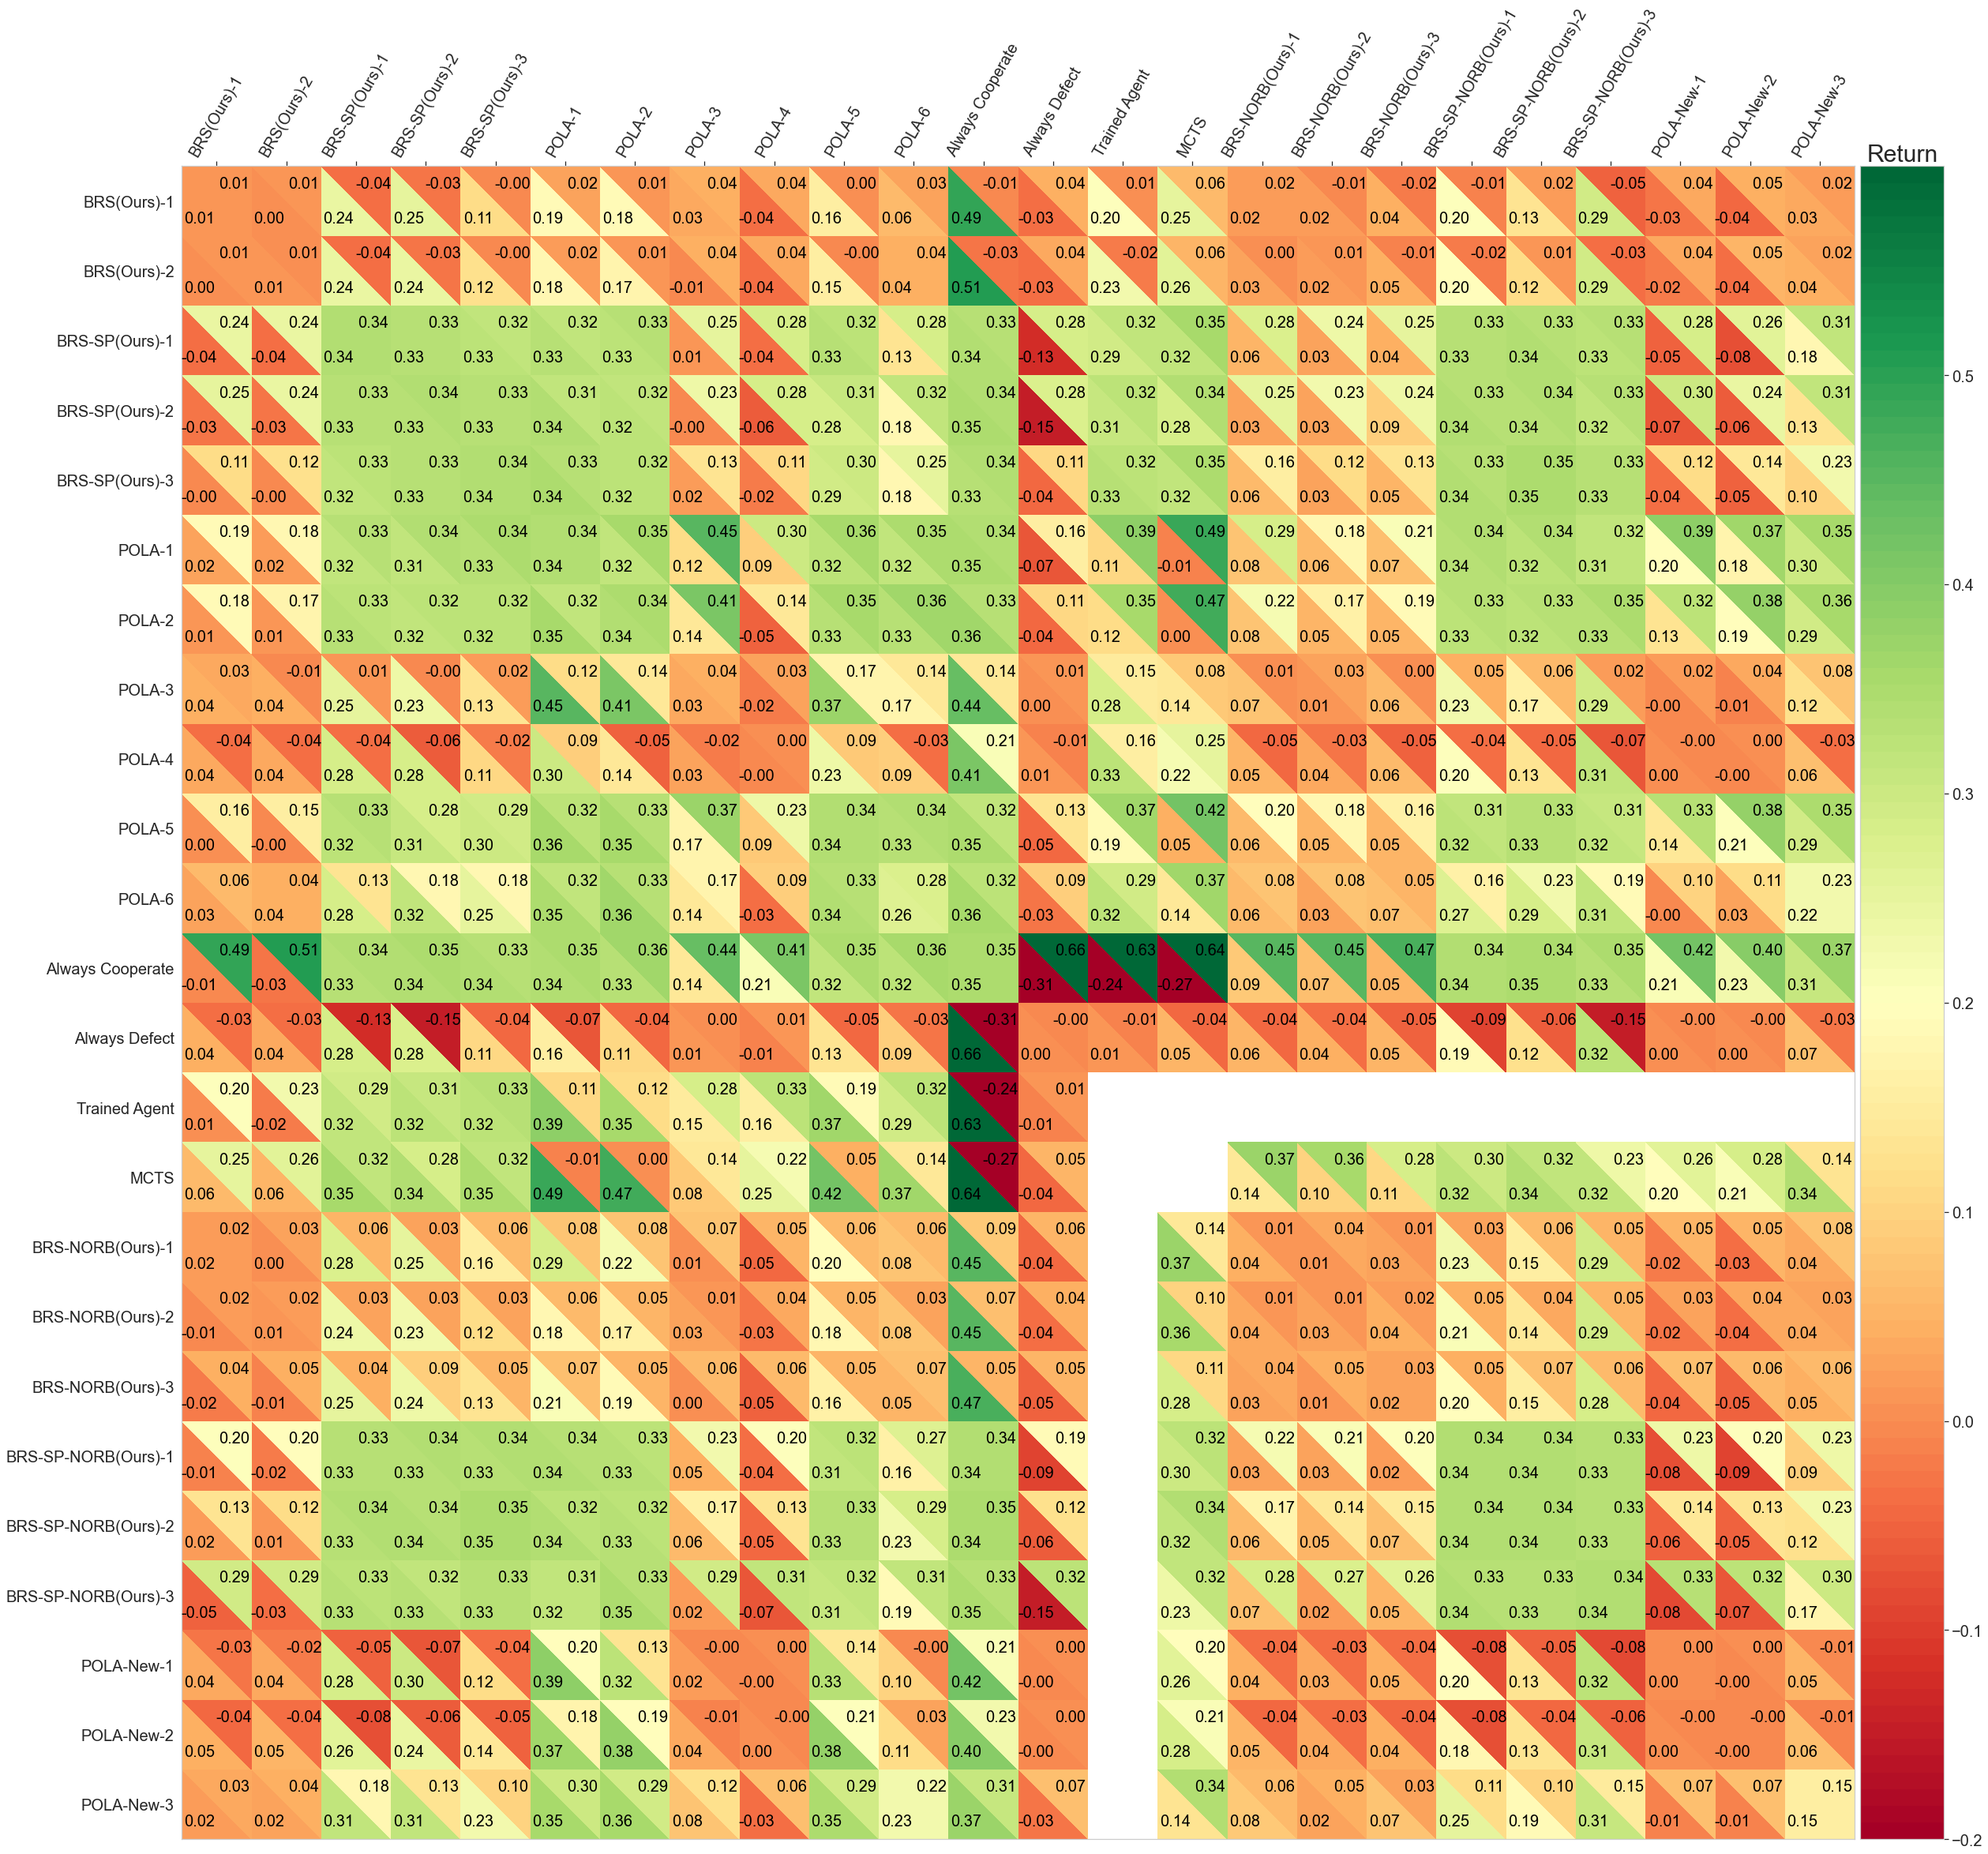

In [36]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

def plot_league_result(league_result):
    """
    Plot the league result as a heatmap
    league_result: a dictionary of the form {(agent_1, agent_2): (agent_1_num, agent_2_num)}
    """
    agent_names = set(k2 for k1, k2 in league_result.keys())
    agent_names = sorted(list(agent_names))
    assert set(agent_names) == set(agent_clean_names)
    agent_names = agent_clean_names
    print(f'agent_names: {agent_names}')

    # Define custom colors
    low_color = 'red'
    high_color = 'green'

    # Create a custom colormap
    cmap = 'RdYlGn'

    M = len(agent_names)
    N = len(agent_names)
    x = np.arange(M + 1) # 0, 1, ..., M
    y = np.arange(N + 1) # 0, 1, ..., N
    xs, ys = np.meshgrid(x, y) # (N+1, M+1)
    zs_1 = [league_result[(agent_1, agent_2)][0] for agent_1 in agent_names for agent_2 in agent_names]
    zs_2 = [league_result[(agent_1, agent_2)][1] for agent_1 in agent_names for agent_2 in agent_names]
    zs_1 = np.array(zs_1)
    zs_2 = np.array(zs_2)
    print(f'zs_1.shape: {zs_1.shape}, zs_2.shape: {zs_2.shape}')

    fig, ax = plt.subplots(figsize=(40, 40))
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.1)

    triangles1 = [(i + j*(M+1), i + (j+1)*(M+1), i+1 + (j+1)*(M+1)) for j in range(N) for i in range(M)] # (i, j) (i, j+1) (i+1, j+1)
    triangles2 = [(i + j*(M+1), i+1 + (j)*(M+1), i + 1 + (j+1)*(M+1)) for j in range(N) for i in range(M)] # (i, j) (i+1, j) (i+1, j+1)
    triang1 = Triangulation(xs.ravel(), ys.ravel(), triangles1)
    triang2 = Triangulation(xs.ravel(), ys.ravel(), triangles2)
    plt.rcParams['axes.grid'] = False
    img1 = ax.tripcolor(triang1, zs_1, cmap=plt.get_cmap(cmap, 100), vmin=-0.2, vmax=0.6)
    img2 = ax.tripcolor(triang2, zs_2, cmap=plt.get_cmap(cmap, 100), vmin=-0.2, vmax=0.6)
    plt.colorbar(img1, ticks=np.arange(-0.2, 0.6, 0.1), cax=cax1)
    # add title for the colorbar
    cax1.set_title('Return', fontsize=30)
    # increase colorbar tick font size
    cax1.tick_params(labelsize=20)

    # write text
    if True:
        for i in range(M):
            for j in range(N):
                if f'{zs_1[i + j * M]}' != 'nan':
                    ax.text(i+0.25, j+0.75, f'{zs_1[i + j*M]:.2f}', ha='center', va='center', fontsize=20, color='black')
                    ax.text(i+0.75, j+0.25, f'{zs_2[i + j*M]:.2f}', ha='center', va='center', fontsize=20, color='black')

    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.set_xticks(x[:-1]+0.5, rotation=90)
    clean_names = [name_to_plot_name[name] for name in agent_names]
    ax.set_xticklabels(clean_names, rotation=60, fontsize=20)
    ax.set_yticks(y[:-1]+0.5)
    ax.set_yticklabels(clean_names, fontsize=20)
    # make it square
    ax.set_aspect('equal', 'box')
    ax.xaxis.tick_top()
    ax.invert_yaxis()

return_matrix = {}
for k, v in result_matrix.items():
    assert len(v) == 1
    return_matrix[k] = v[0]['mean_rewards']

# fill in the missing entries
agent_names = agent_clean_names
agent_names = sorted(list(agent_names))
for agent_1 in agent_names:
    for agent_2 in agent_names:
        if (agent_1, agent_2) not in return_matrix:
            if (agent_2, agent_1) in return_matrix:
                ret = return_matrix[(agent_2, agent_1)]
                return_matrix[(agent_1, agent_2)] = (ret[1], ret[0])
            else:
                return_matrix[(agent_1, agent_2)] = (np.nan, np.nan)

plot_league_result(return_matrix)
# save the figure to pdf
plt.savefig('league_result.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Plot the individual agent's evaluation metrics

In [ ]:
agent_names

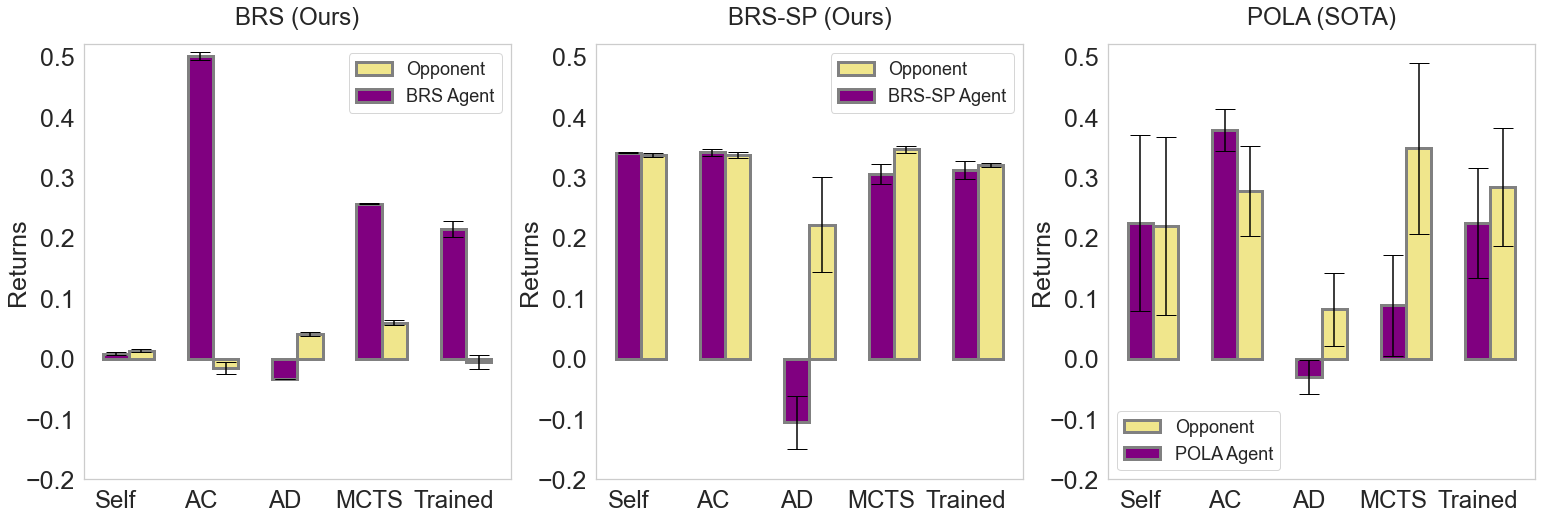

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(26,8))

# Define width and indices for bars
width = 0.30
ind = np.arange(len(opponents))

agent2 = 'ours_self_play'
agent2_name = 'BRS-SP (Ours)'
agent3 = 'pola'
agent3_name = 'POLA (SOTA)'
agent1 = 'ours_no_self_play'
agent1_name = 'BRS (Ours)'


# Bar plot 1
y = [x[0] for x in mean_rets_list_dict[agent1]]
bar1 = axs[0].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent1]]
axs[0].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

y = [x[1] for x in mean_rets_list_dict[agent1]]
bar2 = axs[0].bar(ind, y, width, label='BRS Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent1]]
axs[0].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 2
y = [x[0] for x in mean_rets_list_dict[agent2]]
bar3 = axs[1].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent2]]
axs[1].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent2]]
bar4 = axs[1].bar(ind, y, width, label='BRS-SP Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent2]]
axs[1].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)

# Bar plot 3
y = [x[0] for x in mean_rets_list_dict[agent3]]
bar5 = axs[2].bar(ind + width, y, width, label='Opponent', color='khaki')
yerr = [x[0] for x in std_rets_list_dict[agent3]]
axs[2].errorbar(x=ind + width, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)
y = [x[1] for x in mean_rets_list_dict[agent3]]
bar6 = axs[2].bar(ind , y, width, label='POLA Agent', color='purple')
yerr = [x[1] for x in std_rets_list_dict[agent3]]
axs[2].errorbar(x=ind, y=y, yerr=yerr, fmt='none', ecolor='black', capsize=10)


# Set gray border over bars
for rect in bar1 + bar2 + bar3 + bar4 + bar5 + bar6:
    rect.set_edgecolor('gray')
    rect.set_linewidth(3.0)

# Customize the appearance of the plots
axs[0].set_title(agent1_name, fontsize=24, pad=20)
axs[1].set_title(agent2_name, fontsize=24, pad=20)
axs[2].set_title(agent3_name, fontsize=24, pad=20)

# share the y axis
axs[0].set_ylim([-0.2, 0.52])
axs[1].set_ylim([-0.2, 0.52])
axs[2].set_ylim([-0.2, 0.52])
for ax in axs:
    ax.set_xticks(ind)
    ax.set_xticklabels(map(lambda name: opponent_renaming_dict[name], opponents), rotation=0, fontsize=24)
    #ax.set_xlabel(r'Agents', fontsize=25)
    ax.set_ylabel(r'Returns', fontsize=25, labelpad=-5)
    ax.tick_params(axis='y', labelsize=25)
    ax.legend(fontsize=18)
    # decrease distance between y label and y axis

#plt.tight_layout()  # Add space between plots
plt.show()

# save plot high resolution in pdf
fig.savefig('coin_all_figures.pdf', bbox_inches='tight', dpi=300)